In [1]:
from sklearn.base import BaseEstimator
import numpy as np
import matplotlib.pyplot as plt
import random as random
import pandas as pd

In [4]:
class LMSTrainer(BaseEstimator):
    def __init__(self, lr=0.1, analitic=False):
        self.analitic = analitic
        self.lr = lr
        self.theta = np.matrix([[1], [1]])
        self._trained = False
        self.cost_history = []
        
    def prepare_data(self, X, Y):
        X = np.matrix(X)
        X = np.concatenate(([[1] for i in range(X.shape[0])], X), axis=1) #Add columns of ones
        Y = np.matrix(Y).T #Transpose Y matrix
        return (X, Y)
        
    def gen_random_theta(self, size):
        return np.matrix([random.randrange(-2, 2, 1) for i in range(size)]).T
        
    def test(self, X_test, Y_test):
        temp = self.prepare_data(X_test, Y_test)
        X_test = temp[0]
        Y_test = temp[1]
        print('Test error: ', self.cost(X_test, Y_test.T))
            
    def predict(self, X):
        if not self._trained:
            raise RuntimeError("You must train classifer before predicting data!")
        else:
            X = np.matrix(X)
            return self.theta[0] + X * self.theta[1:]
    
    def h(self, x):
        return x * self.theta

    def cost(self, X, Y):
        return sum([r[0,0] ** 2 for r in self.h(X) - Y]) / (2 * len(X))
    
    def fit(self, X, Y):
        temp = self.prepare_data(X, Y)
        self.X = temp[0]
        self.Y = temp[1]
        #self.theta = self.gen_random_theta(self.X.shape[1])
        
        if self.analitic:
            # Analitic
            # (X^T * X)^-1 * X^T * Y
            self.theta = np.linalg.pinv(self.X.T.dot(self.X)).dot(self.X.T).dot(self.Y)            
        else:
            # Gradient descent
            cost = 0
            self.cost_history = []
            c = 0
            i = 0
            #while (abs(self.cost(self.X, self.Y) - cost) > 0.00000001):
            while(i < 3):
                #print('Iteration ', i + 1, '\n')
                cost = self.cost(self.X, self.Y)
                self.cost_history.append(cost)
                loss = np.matrix(self.h(self.X) - self.Y)
                gradient = self.X.T * loss
                print('Cost:\n', cost, '\n')
                print('X:\n', self.X, '\n')
                print('Theta(n):\n', self.theta, '\n')
                print('h(X):\n', self.h(self.X), '\n')
                print('Y:\n', self.Y, '\n')
                print('Loss:\n', loss, '\n')
                print('Gradient:\n', gradient, '\n')
                self.theta = self.theta - self.lr * gradient
                print('Theta(n+1):\n', self.theta, '\n--------------------------------------------')
                i += 1

            plt.plot(model.cost_history)
            plt.title('Error history')
            plt.ylabel('error')
            plt.xlabel('iteration')
            plt.show()
            
        self._trained = True
        print("Theta:\n", self.theta, "\nTraining error:\n", model.cost(self.X, self.Y))

    def plot(self, X, Y):
        plt.plot(X, self.h(X))
        plt.plot(X, Y, 'ro')
        plt.show()

Cost:
 0.8333333333333334 

X:
 [[1 1]
 [1 2]
 [1 3]] 

Theta(n):
 [[1]
 [1]] 

h(X):
 [[2]
 [3]
 [4]] 

Y:
 [[2]
 [4]
 [6]] 

Loss:
 [[ 0]
 [-1]
 [-2]] 

Gradient:
 [[-3]
 [-8]] 

Theta(n+1):
 [[1.3]
 [1.8]] 
--------------------------------------------
Cost:
 0.4183333333333335 

X:
 [[1 1]
 [1 2]
 [1 3]] 

Theta(n):
 [[1.3]
 [1.8]] 

h(X):
 [[3.1]
 [4.9]
 [6.7]] 

Y:
 [[2]
 [4]
 [6]] 

Loss:
 [[1.1]
 [0.9]
 [0.7]] 

Gradient:
 [[2.7]
 [5. ]] 

Theta(n+1):
 [[1.03]
 [1.3 ]] 
--------------------------------------------
Cost:
 0.23178333333333345 

X:
 [[1 1]
 [1 2]
 [1 3]] 

Theta(n):
 [[1.03]
 [1.3 ]] 

h(X):
 [[2.33]
 [3.63]
 [4.93]] 

Y:
 [[2]
 [4]
 [6]] 

Loss:
 [[ 0.33]
 [-0.37]
 [-1.07]] 

Gradient:
 [[-1.11]
 [-3.62]] 

Theta(n+1):
 [[1.141]
 [1.662]] 
--------------------------------------------


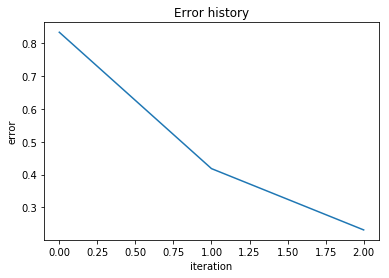

Theta:
 [[1.141]
 [1.662]] 
Training error:
 0.14619383333333327


In [5]:
file = pd.read_csv("datasets/dataset_linear_regression.csv", delimiter=";", decimal=",")
data = np.matrix(file.values)

# X
trainX = np.matrix([[1], [2], [3]])
#trainX = np.matrix([[1], [3], [1], [3], [5]])
#trainX = np.matrix([[1, 2], [3, 1], [4, 2]]) # f(x) = 4x - 3x - 2
#trainX = data[:,:data.shape[1] - 1] # Data from data_set
# Y
trainY = np.matrix([2, 4, 6])
#trainY = np.matrix([1, 1, 4, 4, 5])
#trainY = np.matrix([-4, 7, 8])
#print(trainY.T)

#print('trainX:\n', trainX, '\ntrainY:\n', trainY)

model = LMSTrainer(analitic=False)
model.theta = np.matrix([[1], [1]])
model.fit(trainX, trainY)


In [6]:
model.predict([[4]])

matrix([[7.789]])